## Importing all the required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats
import random
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn import preprocessing
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn import metrics
from numpy import cov
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


## String Converter

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Setting the current working directory

In [3]:
os.chdir("C:/Users/Arnav Phukan/Desktop/Projects/Employee Absenteeism")

## Checking the directory is present

In [4]:
os.getcwd()

'C:\\Users\\Arnav Phukan\\Desktop\\Projects\\Employee Absenteeism'

## Importing the dataset

In [5]:
df = pd.read_excel("Abs.xls")

## Dimension check

In [6]:
df.shape

(740, 21)

In [7]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.000,7.000,3,1,289.000,36.000,13.000,33.000,239554.000,...,0.000,1.000,2.000,1.000,0.000,1.000,90.000,172.000,30.000,4.000
1,36,0.000,7.000,3,1,118.000,13.000,18.000,50.000,239554.000,...,1.000,1.000,1.000,1.000,0.000,0.000,98.000,178.000,31.000,0.000
2,3,23.000,7.000,4,1,179.000,51.000,18.000,38.000,239554.000,...,0.000,1.000,0.000,1.000,0.000,0.000,89.000,170.000,31.000,2.000
3,7,7.000,7.000,5,1,279.000,5.000,14.000,39.000,239554.000,...,0.000,1.000,2.000,1.000,1.000,0.000,68.000,168.000,24.000,4.000
4,11,23.000,7.000,5,1,289.000,36.000,13.000,33.000,239554.000,...,0.000,1.000,2.000,1.000,0.000,1.000,90.000,172.000,30.000,2.000


## Check for uniqueness

In [8]:
df['Absenteeism time in hours'].value_counts()

8.000      199
2.000      155
3.000      110
1.000       88
4.000       60
0.000       36
16.000      19
24.000      16
40.000       7
5.000        7
32.000       5
64.000       3
80.000       3
120.000      3
56.000       2
112.000      2
104.000      1
7.000        1
48.000       1
Name: Absenteeism time in hours, dtype: int64

# Datatypes of each column

In [9]:
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

## Missing value analysis

In [10]:
import pandas as pd
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index':'variables',0:'Missing_Percentage'})
missing_val['Missing_Percentage'] = (missing_val['Missing_Percentage']/len(df))*100
print(missing_val)

                          variables  Missing_Percentage
0                                ID               0.000
1                Reason for absence               0.405
2                  Month of absence               0.135
3                   Day of the week               0.000
4                           Seasons               0.000
5            Transportation expense               0.946
6   Distance from Residence to Work               0.405
7                      Service time               0.405
8                               Age               0.405
9            Work load Average/day                1.351
10                       Hit target               0.811
11             Disciplinary failure               0.811
12                        Education               1.351
13                              Son               0.811
14                   Social drinker               0.405
15                    Social smoker               0.541
16                              Pet             

## Imputing missing values with the help of median

In [11]:
df['Reason for absence'] = df['Reason for absence'].fillna(df['Reason for absence'].median())
df['Month of absence'] = df['Month of absence'].fillna(df['Month of absence'].median())
df['Transportation expense'] = df['Transportation expense'].fillna(df['Transportation expense'].median())
df['Distance from Residence to Work'] = df['Distance from Residence to Work'].fillna(df['Distance from Residence to Work'].median())
df['Service time'] = df['Service time'].fillna(df['Service time'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Work load Average/day '] = df['Work load Average/day '].fillna(df['Work load Average/day '].median())
df['Hit target'] = df['Hit target'].fillna(df['Hit target'].median())
df['Disciplinary failure'] = df['Disciplinary failure'].fillna(df['Disciplinary failure'].median())
df['Education'] = df['Education'].fillna(df['Education'].median())
df['Social drinker'] = df['Social drinker'].fillna(df['Social drinker'].median())
df['Social smoker'] = df['Social smoker'].fillna(df['Social smoker'].median())
df['Son'] = df['Son'].fillna(df['Son'].median())
df['Pet'] = df['Pet'].fillna(df['Pet'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())
df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].mean())
df['Absenteeism time in hours'] =df['Absenteeism time in hours'].fillna(df['Absenteeism time in hours'].median())
df.isnull().sum()
data =df.copy()
df['ID'] = df['ID'].astype('category')
df['Reason for absence'] = df['Reason for absence'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Social drinker'] = df['Social drinker'].astype('category')
df['Social smoker'] = df['Social smoker'].astype('category')


## Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2983d48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2983ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2983408>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c286ef48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c28749c8>],
 'means': []}

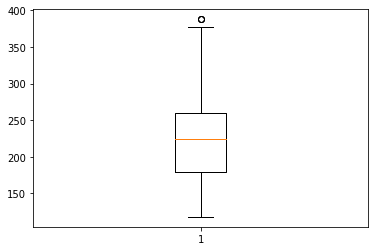

In [12]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.boxplot(df['Transportation expense'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2ba5448>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2ba5f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2b9eb88>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2ba9a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2ba9dc8>],
 'means': []}

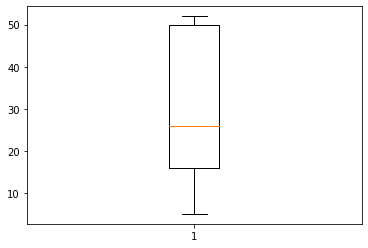

In [13]:
plt.boxplot(df['Distance from Residence to Work'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2c089c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2c08ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2c08208>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2c0dfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2c0df48>],
 'means': []}

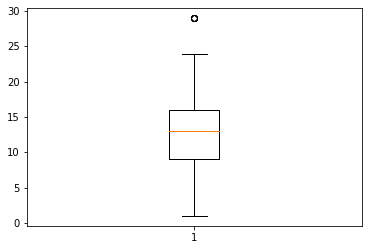

In [14]:
plt.boxplot(df['Service time'])



{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2c76c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2c79c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2c76208>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2c7eb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2c7ec48>],
 'means': []}

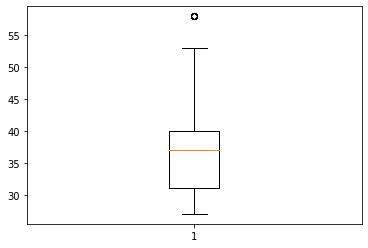

In [15]:
plt.boxplot(df['Age'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2ce27c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2ce2f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2cddd48>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2ce6e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2cedc48>],
 'means': []}

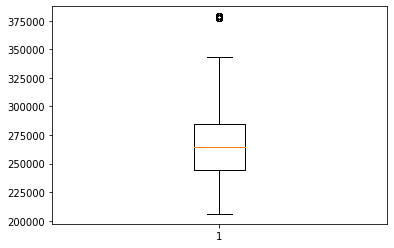

In [16]:
plt.boxplot(df['Work load Average/day '])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2d4ecc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2ca3c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2d4e288>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2d58c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2d58cc8>],
 'means': []}

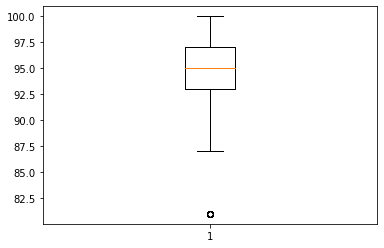

In [17]:
plt.boxplot(df['Hit target'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2dbd708>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2dbde08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2db8c88>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2dc2d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2dc8c08>],
 'means': []}

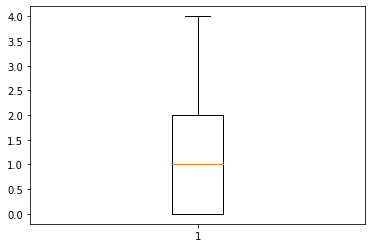

In [18]:
plt.boxplot(df['Son'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2e2e888>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2e2ef88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2e28dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2e31f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2e37e88>],
 'means': []}

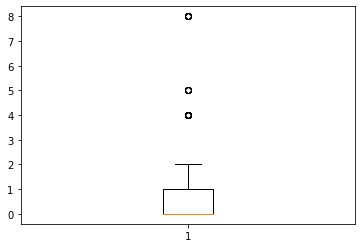

In [19]:
plt.boxplot(df['Pet'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2e9da48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2ea2a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2e99fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2ea5a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2ea5b08>],
 'means': []}

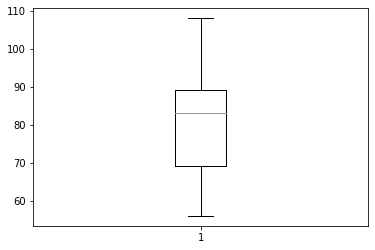

In [20]:
plt.boxplot(df['Weight'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c2f06548>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2f06c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c2f00ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2f0ac08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c2f0f9c8>],
 'means': []}

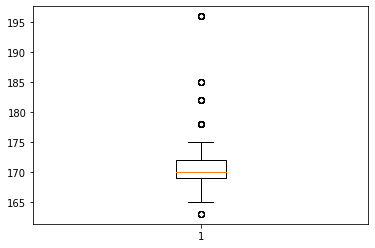

In [21]:
plt.boxplot(df['Height'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c3f42448>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c3f42b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c3f3e9c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c3f45b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c3f488c8>],
 'means': []}

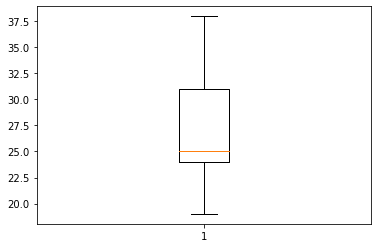

In [22]:
plt.boxplot(df['Body mass index'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c3faeac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c3fb3a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c3faaf88>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c3fb8a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c3fb8f48>],
 'means': []}

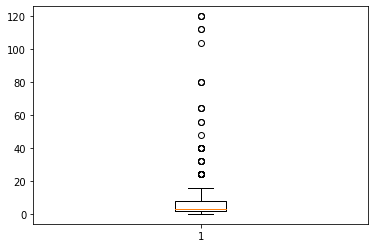

In [23]:
plt.boxplot(df['Absenteeism time in hours'])

In [24]:
for i in df :
    print(i)
    q65,q35 = np.percentile(df.loc[:,i],[65,35])
    iqr = q65 - q35
    min = q35 - (iqr*1.5)
    max = q65 + (iqr*1.5)
    
    print(min)
    print(max)

ID
-3.5
40.5
Reason for absence
12.124999999999943
29.525000000000034
Month of absence
-2.0
14.0
Day of the week
0.0
8.0
Seasons
0.5
4.5
Transportation expense
95.0
319.0
Distance from Residence to Work
16.0
40.0
Service time
6.5
18.5
Age
25.5
45.5
Work load Average/day 
216911.5
309995.5
Hit target
87.0
103.0
Disciplinary failure
0.0
0.0
Education
1.0
1.0
Son
-1.5
2.5
Social drinker
-1.5
2.5
Social smoker
0.0
0.0
Pet
-1.5
2.5
Weight
40.5
116.5
Height
167.0
175.0
Body mass index
20.5
32.5
Absenteeism time in hours
-7.0
17.0


## Calculating the min & max values

In [25]:
q65,q35 = np.percentile(df['Transportation expense'],[65,35])
iqr = q65 - q35
min1= q35 - (iqr*1.5)
max1 = q65 + (iqr*1.5)
print(min1)
print(max1)

95.0
319.0


In [26]:
q65,q35 = np.percentile(df['Age'],[65,35])
iqr = q65 - q35
min2 = q35 - (iqr*1.5)
max2 = q65 + (iqr*1.5)
print(min2)
print(max2)

25.5
45.5


In [27]:
q65,q35 = np.percentile(df['Service time'],[65,35])
iqr = q65 - q35
min3= q35 - (iqr*1.5)
max3 = q65 + (iqr*1.5)
print(min3)
print(max3)

6.5
18.5


In [28]:
q65,q25 = np.percentile(df['Work load Average/day '],[65,35])
iqr = q65 - q35
min4 = q35 - (iqr*1.5)
max4 = q65 + (iqr*1.5)
print(min4)
print(max4)

-412606.0
687706.0


In [29]:
q65,q35 = np.percentile(df['Hit target'],[65,35])
iqr = q65 - q35
min5 = q35 - (iqr*1.5)
max5 = q65 + (iqr*1.5)
print(min5)
print(max5)

87.0
103.0


In [30]:
q65,q35 = np.percentile(df['Pet'],[65,35])
iqr = q65 - q35
min6 = q35 - (iqr*1.5)
max6 = q65 + (iqr*1.5)
print(min6)
print(max6)

-1.5
2.5


In [31]:
q65,q35 = np.percentile(df['Height'],[65,35])
iqr = q65 - q35
min7 = q35 - (iqr*1.5)
max7 = q65 + (iqr*1.5)
print(min7)
print(max7)

167.0
175.0


## Imputing outliers values with median

In [32]:
df['Transportation expense'] = df['Transportation expense'].fillna(df['Transportation expense'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Work load Average/day '] = df['Work load Average/day '].fillna(df['Work load Average/day '].median())
df['Hit target'] = df['Hit target'].fillna(df['Hit target'].median())
df['Service time'] = df['Service time'].fillna(df['Service time'].median())
df['Pet'] = df['Pet'].fillna(df['Pet'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Absenteeism time in hours'] =df['Absenteeism time in hours'].fillna(df['Absenteeism time in hours'].median())


## Copying data in new object "data"

In [33]:
df['ID'] = data['ID']
df['Reason for absence'] = data['Reason for absence']
df['Month of absence'] = data['Month of absence']
df['Day of the week'] = data['Day of the week']
df['Seasons'] = data['Seasons']
df['Distance from Residence to Work'] = data['Distance from Residence to Work']
df['Disciplinary failure'] = data['Disciplinary failure']
df['Education'] = data['Education']
df['Son'] = data['Son']
df['Social drinker'] = data['Social drinker']
df['Social smoker'] = data['Social smoker']
df['Weight'] = data['Weight']
df['Body mass index'] = data ['Body mass index']

## Checking missing values after outlier analysis

In [34]:
missval = pd.DataFrame(df.isnull().sum())
print(missval)

                                 0
ID                               0
Reason for absence               0
Month of absence                 0
Day of the week                  0
Seasons                          0
Transportation expense           0
Distance from Residence to Work  0
Service time                     0
Age                              0
Work load Average/day            0
Hit target                       0
Disciplinary failure             0
Education                        0
Son                              0
Social drinker                   0
Social smoker                    0
Pet                              0
Weight                           0
Height                           0
Body mass index                  0
Absenteeism time in hours        0


## Converting data in proper data types

In [35]:
df['ID'] = df['ID'].astype('category')
df['Reason for absence'] = df['Reason for absence'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Social drinker'] = df['Social drinker'].astype('category')
df['Social smoker'] = df['Social smoker'].astype('category')

## Feature Selection

In [36]:
numeric_c = df[['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target',
     'Son', 'Pet', 'Weight', 'Height', 'Body mass index','Absenteeism time in hours']]
print(numeric_c)

     Transportation expense  Distance from Residence to Work  Service time  \
0                   289.000                           36.000        13.000   
1                   118.000                           13.000        18.000   
2                   179.000                           51.000        18.000   
3                   279.000                            5.000        14.000   
4                   289.000                           36.000        13.000   
..                      ...                              ...           ...   
735                 289.000                           36.000        13.000   
736                 235.000                           11.000        14.000   
737                 118.000                           14.000        13.000   
738                 231.000                           35.000        14.000   
739                 179.000                           45.000        14.000   

       Age  Work load Average/day   Hit target   Son   Pet  Wei

In [37]:
corr = numeric_c.corr()

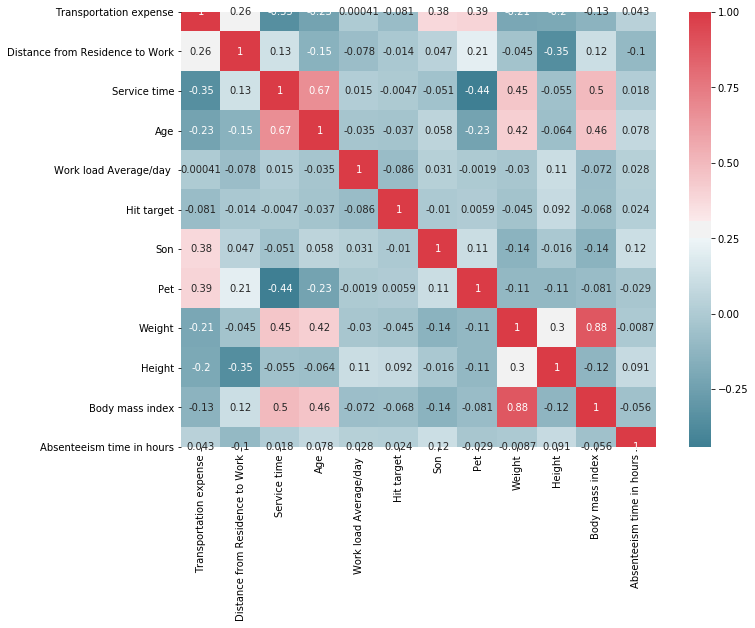

In [38]:
f,ax = plt.subplots(figsize = (12,8))
sns.heatmap(corr,mask = np.zeros_like(corr,dtype = np.object),cmap = sns.diverging_palette(220,10,as_cmap = True),square = True, ax=ax,annot = True)

## ANOVA for categorical variable

In [39]:
factor = df[['ID', 'Reason for absence', 'Month of absence', 'Day of the week','Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
       'Social smoker',]]

In [40]:
factor

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
0,11,26.000,7.000,3,1,0.000,1.000,1.000,0.000
1,36,0.000,7.000,3,1,1.000,1.000,1.000,0.000
2,3,23.000,7.000,4,1,0.000,1.000,1.000,0.000
3,7,7.000,7.000,5,1,0.000,1.000,1.000,1.000
4,11,23.000,7.000,5,1,0.000,1.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...
735,11,14.000,7.000,3,1,0.000,1.000,1.000,0.000
736,1,11.000,7.000,3,1,0.000,3.000,0.000,0.000
737,4,0.000,0.000,3,1,0.000,1.000,1.000,0.000
738,8,0.000,0.000,4,2,0.000,1.000,1.000,0.000


In [41]:
print(stats.f_oneway(df["Absenteeism time in hours"],df["Reason for absence"]))
print(stats.f_oneway(df["Absenteeism time in hours"],df["Month of absence"]))
print(stats.f_oneway(df["Absenteeism time in hours"],df["Day of the week"]))
print(stats.f_oneway(df["Absenteeism time in hours"],df["Seasons"]))
print(stats.f_oneway(df["Absenteeism time in hours"],df["Disciplinary failure"]))
print(stats.f_oneway(df["Absenteeism time in hours"],df["Education"]))
print(stats.f_oneway(df["Absenteeism time in hours"],df["Social drinker"]))
print(stats.f_oneway(df["Absenteeism time in hours"],df["Social smoker"]))


F_onewayResult(statistic=455.3711473915174, pvalue=2.707113523010777e-88)
F_onewayResult(statistic=1.1472281864806217, pvalue=0.28430500959032)
F_onewayResult(statistic=35.90534534236459, pvalue=2.597843591203105e-09)
F_onewayResult(statistic=77.43805808135198, pvalue=3.7436356639463614e-18)
F_onewayResult(statistic=194.00177378775473, pvalue=1.5848851694285747e-41)
F_onewayResult(statistic=129.49899329227654, pvalue=8.030025614992404e-29)
F_onewayResult(statistic=165.5086864619558, pvalue=5.582372789491098e-36)
F_onewayResult(statistic=192.82867048087573, pvalue=2.6693616173845234e-41)


In [42]:
data = df.copy()

In [43]:
df1 = df.drop(['ID','Seasons','Education','Height','Hit target','Pet','Body mass index','Disciplinary failure','Age','Social smoker','Social drinker','Son'],axis = 1)


In [44]:
df1.shape

(740, 9)

## Data normalization

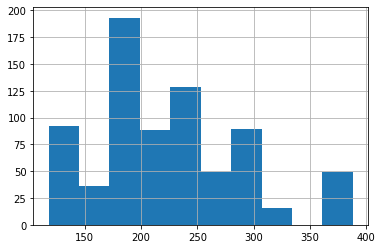

In [45]:
df1['Transportation expense'].hist(bins = 10)


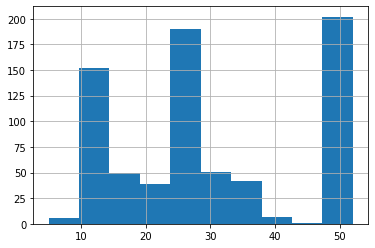

In [46]:
df1['Distance from Residence to Work'].hist(bins = 10)


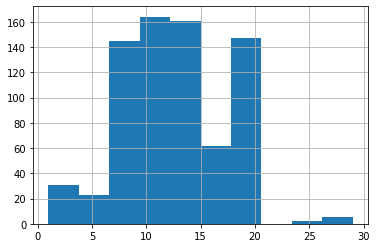

In [47]:
df1['Service time'].hist(bins = 10)


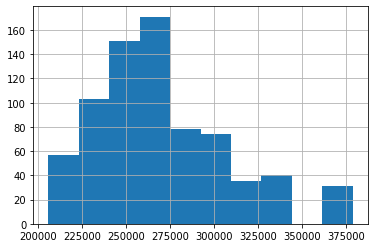

In [48]:
df1[ 'Work load Average/day '].hist(bins = 10)


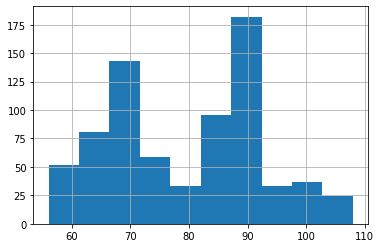

In [49]:
df1['Weight'].hist(bins = 10)

In [50]:
from sklearn.preprocessing import normalize
normalized_df= preprocessing.normalize(df)
df.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                 float64
Social drinker                     category
Social smoker                      category
Pet                                 float64
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

## ML Algorithm
### Dividing data into train and test

In [51]:
train,test = train_test_split(df,test_size= 0.2)

## Decision Tree Regression

In [52]:
random.seed(123)
fit = DecisionTreeRegressor(max_depth = 2).fit(train.iloc[:,0:8],train.iloc[:,8])

In [53]:
predictions_dt = fit.predict(test.iloc[:,0:8])

In [54]:
mse_dt = (mean_squared_error(test.iloc[:,8], predictions_dt))
print(mse_dt)

11.75300848253558


In [55]:
rmse_dt = sqrt(mean_squared_error(test.iloc[:,8],predictions_dt))
print(rmse_dt)

3.4282661043938205


## RandomForest
### n=200

In [56]:
random.seed(123)
rfregressor200 = RandomForestRegressor(n_estimators = 200, random_state = 0)
rfregressor200.fit(train.iloc[:,0:8],train.iloc[:,8])
predictions_rf200 = rfregressor200.predict(test.iloc[:,0:8])
mse_rf200 = (mean_squared_error(test.iloc[:,8], predictions_rf200))
print(mse_rf200)
rmse_rf200 = sqrt(mean_squared_error(test.iloc[:,8],predictions_rf200))
print(rmse_rf200)

1.8567787162162168
1.362636677994621


### n=300

In [57]:
random.seed(123)
rfregressor300 = RandomForestRegressor(n_estimators = 300, random_state = 0)
rfregressor300.fit(train.iloc[:,0:8],train.iloc[:,8])
predictions_rf300 = rfregressor200.predict(test.iloc[:,0:8])
mse_rf300 = (mean_squared_error(test.iloc[:,8], predictions_rf200))
print(mse_rf300)
rmse_rf300 = sqrt(mean_squared_error(test.iloc[:,8],predictions_rf300))
print(rmse_rf300)

1.8567787162162168
1.362636677994621


### n=400

In [58]:
random.seed(123)
rfregressor400 = RandomForestRegressor(n_estimators = 400, random_state = 0)
rfregressor400.fit(train.iloc[:,0:8],train.iloc[:,8])
predictions_rf400 = rfregressor400.predict(test.iloc[:,0:8])
mse_rf400 = (mean_squared_error(test.iloc[:,8], predictions_rf400))
print(mse_rf400)
rmse_rf400 = sqrt(mean_squared_error(test.iloc[:,8],predictions_rf400))
print(rmse_rf400)

1.8149029138513517
1.3471833259996027
